## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head(2)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17


In [2]:
study_results.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [3]:
# Combine the data into a single dataset
complete_mouse_data_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
complete_mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
distinct_mice=complete_mouse_data_df["Mouse ID"].nunique()
distinct_mice

249

In [5]:
# number of mouse ids after merge
mouse_count=complete_mouse_data_df["Mouse ID"].count()
mouse_count

1893

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate = complete_mouse_data_df[complete_mouse_data_df.duplicated()]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df= complete_mouse_data_df.drop_duplicates()
clean_mouse_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [10]:
# Checking the number of mice in the clean DataFrame.
distinct_mice_clean=clean_mouse_df["Mouse ID"].nunique()
distinct_mice_clean


249

In [11]:
# number of mouse ids after duplicates removed
mouse_count_clean=clean_mouse_df["Mouse ID"].count()
mouse_count_clean

1892

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_mouse_df.keys()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [13]:
# groupby tumor regimen

tumor_regimen_df=clean_mouse_df.groupby(["Drug Regimen"])
tumor_volume = tumor_regimen_df["Tumor Volume (mm3)"]

In [38]:
mean_tumor_volume = (tumor_volume).mean()
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.368318
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# median_tumor_volume = tumor_regimen_df["Tumor Volume (mm3)"].median()
# median_tumor_volume

median_tumor_volume = (tumor_volume).median()
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [21]:
#var_tumor_vol  = np.var(tumor_volume,ddof = 0)

var=np.var(tumor_regimen_df["Tumor Volume (mm3)"], axis = 0)
var

TypeError: var() got an unexpected keyword argument 'axis'

In [29]:
SEM=sts.sem((tumor_volume), axis = 0, ddof = 0)
SEM

C:\Users\roeck\anaconda3\envs\Pythondata\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\roeck\anaconda3\envs\Pythondata\lib\site-packages\scipy\stats\stats.py:236: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen SEM is scipy
# Using the aggregation method, produce the same summary statistics in a single line
# source:https://www.geeksforgeeks.org/how-to-convert-pandas-dataframe-into-a-list/

In [28]:
#example from panda homework = group_test=purchase_df.groupby(["Gender"]).agg(['count', np.mean, sum,])["Price"].rename(columns={'count':'Purchase Count','mean' : 'Average Purchase Price', 'sum': 'Total Purchase Value'})
tumor_regimen_agg=clean_mouse_df.groupby(["Drug Regimen"]).agg([np.mean,np.median,np.var,np.std,'sem'])["Tumor Volume (mm3)"]
tumor_regimen_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
list = groupby[tumor_regimen_agg.columns.values.tolist()] + tumor_regimen_agg.values.tolist() 
list

[['mean', 'median', 'var', 'std', 'sem'],
 [40.67574114100001,
  41.557808879999996,
  24.947764120254785,
  4.994773680584014,
  0.32934562340083046],
 [52.59117180960677,
  51.77615728000001,
  39.29017727327859,
  6.268187718414198,
  0.4698205327526109],
 [52.88479510859551,
  51.82058438,
  43.128684128836106,
  6.567243267066944,
  0.4922356938011386],
 [55.23563764047869,
  53.698742644999996,
  68.55357711244599,
  8.279708757706759,
  0.6038598237739697],
 [54.331564658333306,
  52.509284609999995,
  66.17347898736506,
  8.134708291473338,
  0.5964657512424235],
 [54.03358078635358,
  52.28893409,
  61.168082936697,
  7.821002681031186,
  0.5813305510593875],
 [52.368317986,
  50.909964985,
  42.27808961958156,
  6.502160380948901,
  0.5140409128876656],
 [40.2167450667105,
  40.67323554,
  23.486703952095297,
  4.8463082807530204,
  0.3209546065084819],
 [54.23314911988949,
  52.43173664,
  59.45056167336601,
  7.710419033578266,
  0.5731109332771459],
 [53.236506551593415,
 

## Bar and Pie Charts

In [65]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements_df=clean_mouse_df.groupby(["Drug Regimen"]).agg(['count'])["Tumor Volume (mm3)"].reset_index()
measurements_df

,Drug Regimen,count
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,160
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


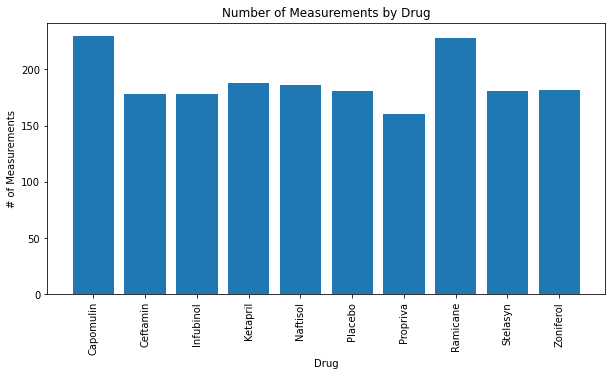

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot. #avg_state_rain activity as example

plt.figure(figsize=(10,5))
xaxis = np.arange(len(measurements_df))
tick_locations = [value for value in xaxis]
plt.bar(xaxis, measurements_df["count"]) 
plt.xticks(tick_locations, measurements_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Measurements by Drug")
plt.xlabel("Drug")
plt.ylabel("# of Measurements")
plt.show()

In [75]:
#create Mouse ID and sex dataframe

sex_mice_df=clean_mouse_df[["Mouse ID","Sex"]]
distinct_mice_df=sex_mice_df.drop_duplicates()
distinct_mice_df.count()


Mouse ID    249
Sex         249
dtype: int64

In [99]:
#clean data frame to get one line of data per Mouse ID

mice_by_sex=distinct_mice_df.groupby(["Sex"])
count_mice_sex=mice_by_sex.count()
count_mice_sex

,Mouse ID
Sex,
Female,124
Male,125


Text(0, 0.5, 'Count')

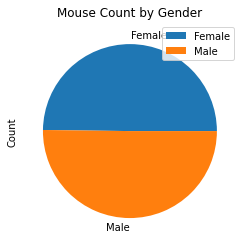

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

count_mice_sex.plot(kind="pie", y='Mouse ID', title = "Mouse Count by Gender")
plt.ylabel("Count")



Text(0, 0.5, 'Count')

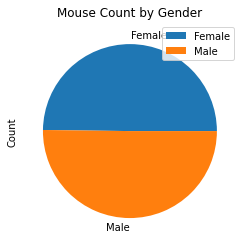

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot=count_mice_sex.plot.pie(y='Mouse ID')
plt.title("Mouse Count by Gender")
plt.ylabel("Count")


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
